# Import libraries

In [1]:
import geopandas
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('temperatures.csv', dtype={'Region': str, 'Country': str, 'State': str, 'City': str, 'Month': int, 'Day': int, 'Year': int, 'AvgTemperature': float})
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


# Data cleaning

In [2]:
df = df[df.AvgTemperature != -99]

L'université d'Ixienne, située dans les dunes du Sahara, est spécialisée dans la haute technologie (conception de matériaux avancés). Elle voudrait effectuer une analyse sur un jeu de données qu'elle possède, celui des températures de grandes villes de la planète.

Son objectif est de comprendre ce qu'elle va devoir inventer comme nouveaux matériaux en fonction des températures qu'il va faire sur la planète dans les prochaines années.

Pour cela elle voudrait les analyses suivantes :

## Les températures moyennes françaises de 1995 à 2019

<AxesSubplot:title={'center':'Les températures moyennes françaises de 1995 à 2019'}, xlabel='Year'>

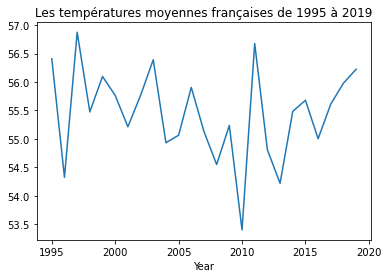

In [4]:
df_fr = df[(df['Country'] == 'France') & (df['Year'] >= 1995) & (df['Year'] <= 2019)]
df_fr.groupby('Year')['AvgTemperature'].mean().plot(title='Les températures moyennes françaises de 1995 à 2019')

## L'évolution moyenne de la témparature chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagramme sur un seul affichage)

In [5]:
df_monthly = df.groupby(['Month', 'Region'])['AvgTemperature'].mean()

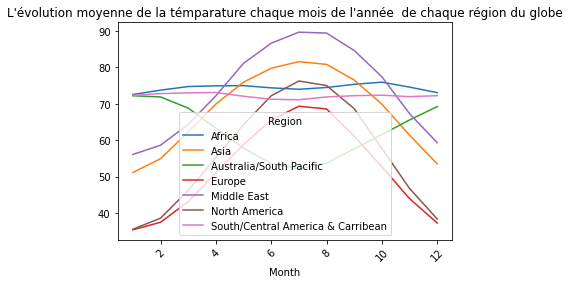

In [6]:
# plot the result 
df_monthly.unstack().plot(title="L'évolution moyenne de la témparature chaque mois de l'année  de chaque région du globe") 
plt.xticks(rotation=45) 
plt.show() 

With suplots

array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

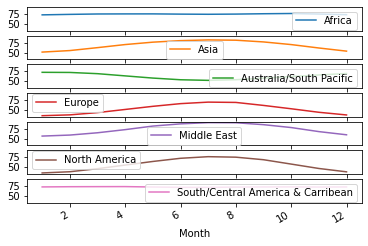

In [7]:
df_monthly.unstack().plot(subplots=True, sharey=True) 

## Le classement graphique des pays les plus chauds au monde


Text(0, 0.5, 'AvgTemperature')

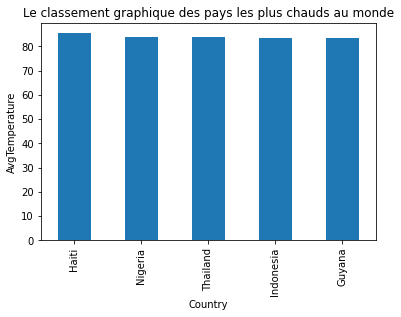

In [8]:
df_hotter = df.groupby('Country', sort = False)['AvgTemperature'].mean()
df_hotter.nlargest().plot.bar()

# Add title and axis names
plt.title('Le classement graphique des pays les plus chauds au monde')
plt.ylabel('AvgTemperature')

## Le classement graphique des pays les plus froids au monde


Text(0, 0.5, 'AvgTemperature')

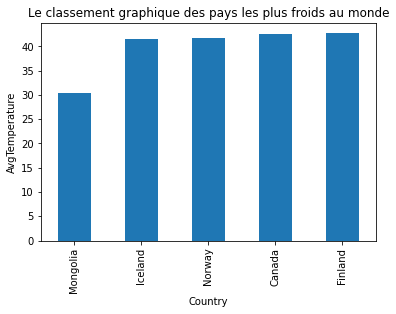

In [9]:
df_colder = df.groupby('Country', sort = False)['AvgTemperature'].mean()
df_colder.nsmallest().plot.bar()

# Add title and axis names
plt.title('Le classement graphique des pays les plus froids au monde')
plt.ylabel('AvgTemperature')

## L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique


In [10]:
df_hotter_colder = df[((df['Country'] == df_hotter.idxmax()) | (df['Country'] == df_colder.idxmin())) & (df['Year'] >= 1995) & (df['Year'] <= 2019)]

In [11]:
df_hotter_colder = df_hotter_colder.groupby(['Year', 'Country'])['AvgTemperature'].mean()

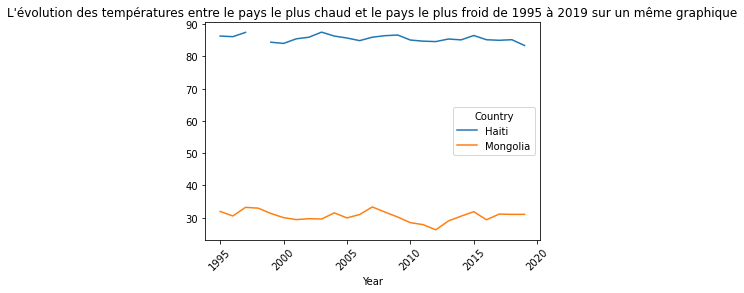

In [12]:
# plot the result 
df_hotter_colder.unstack().plot(title="L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique") 
plt.xticks(rotation=45) 
plt.show() 

## L'évolution de la température moyenne de la ville de Paris.


In [13]:
df_Paris = df[df['City'] == 'Paris']

In [14]:
df_Paris['Date'] =  df_Paris['Day'].map(str) + '-' + df_Paris['Month'].map(str) + '-' + df_Paris['Year'].map(str)
df_Paris['Date'] = pd.to_datetime(df_Paris['Date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')

<ipython-input-14-505288687660>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris['Date'] =  df_Paris['Day'].map(str) + '-' + df_Paris['Month'].map(str) + '-' + df_Paris['Year'].map(str)
<ipython-input-14-505288687660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris['Date'] = pd.to_datetime(df_Paris['Date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')


In [15]:
df_Paris = df_Paris.set_index('Date')

<AxesSubplot:title={'center':"L'évolution de la température moyenne de la ville de Paris."}, xlabel='Date'>

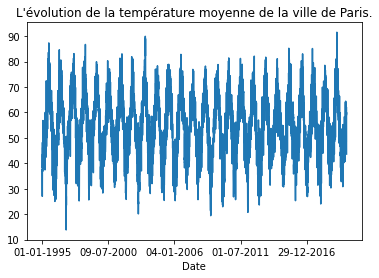

In [16]:
df_Paris['AvgTemperature'].plot(title="L'évolution de la température moyenne de la ville de Paris.")

## La température moyenne de chaque pays sur une carte sur la période 2010-2019

In [7]:
df_2010_2019 = df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]
df_2010_2019 = df_2010_2019.groupby('Country')['AvgTemperature'].mean()

In [5]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head

<bound method NDFrame.head of        pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                 

In [8]:
world = world.merge(df_2010_2019, left_on='name', right_on='Country')

<AxesSubplot:>

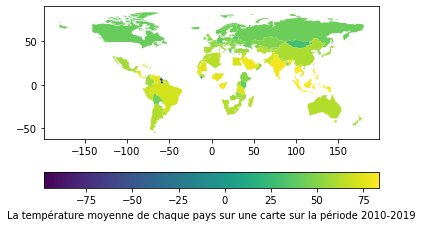

In [12]:
world.plot(column='AvgTemperature', legend=True, legend_kwds={'label': 'La température moyenne de chaque pays sur une carte sur la période 2010-2019', 'orientation': 'horizontal'})

# ~~Bonus 1: SVM~~

In [3]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [4]:
df = df.drop(['State'], axis=1)

In [5]:
df = df.astype({'AvgTemperature': 'float32'})

In [6]:
df.dtypes

Region             object
Country            object
City               object
Month               int32
Day                 int32
Year                int32
AvgTemperature    float32
dtype: object

In [7]:
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(df) # It returns an numpy array

MemoryError: Unable to allocate 42.9 GiB for an array with shape (2826655, 2038) and data type float64